In [1]:
from IPython.core.display import display, HTML
# 노트북 컨테이너 크기 조절
display(HTML("<style>#notebook-container {width: 90% !important; }</style>"))
# 마크다운 폰트
display(HTML("<style>.rendered_html{font-family: 'D2Coding'; font-size: 16pt; line-height: 140%;}</style>"))
# DataFrame 테이블 폰트
display(HTML("<style>.rendered_html table{font-family: 'D2Coding'; font-size: 16pt; line-height: 140%;}</style>"))
# 출력창 폰트
display(HTML("<style>pre{font-family: 'D2Coding', font-size: 16pt;}.rendered_html>ul>li{margin: 10px}</style>"))
display(HTML("<style>div.output_area>pre, div.output_subarea>pre{font-size: 16pt !important; line-height: 140%;}</style>"))
# 코드셀 폰트
display(HTML("<style> .CodeMirror pre {font-family: 'D2Coding'; font-size: 18pt !important; line-height: 140%;}</style>"))

# 패키지 설치

In [1]:
!pip install mySUNI

## 모듈 import

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
from mySUNI import cds
from IPython.display import Image

## 데이터셋 로드

In [3]:
df = sns.load_dataset('titanic')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


**컬럼(columns) 설명**

- survivied: 생존여부 (1: 생존, 0: 사망)
- pclass: 좌석 등급 (1등급, 2등급, 3등급)
- sex: 성별
- age: 나이
- sibsp: 형제 + 배우자 수
- parch: 부모 + 자녀 수
- fare: 좌석 요금
- embarked: 탑승 항구 (S, C, Q)
- class: pclass와 동일
- who: 성별과 동일
- adult_male: 성인 남자 여부
- deck: 데크 번호 (알파벳 + 숫자 혼용)
- embark_town: 탑승 항구 이름
- alive: 생존여부 (yes, no)
- alone: 혼자 탑승 여부

# 통계

**통계**는 데이터 분석에서 굉장히 **중요한 요소**입니다.

데이터에 대한 통계 계산식을 Pandas 함수로 제공하기 때문에 어렵지 않게 통계 값을 산출할 수 있습니다.

## describe() - 요약통계

전반적인 주요 통계를 확인할 수 있습니다.

기본 값으로 **수치형(Numerical) 컬럼**에 대한 통계표를 보여줍니다.

- **count**: 데이터 개수
- **mean**: 평균
- **std**: 표준편차
- **min**: 최솟값
- **max**: 최대값

In [4]:
df.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


**문자열 컬럼에 대한 통계표**도 확인할 수 있습니다.

- **count**: 데이터 개수
- **unique**: 고유 데이터의 값 개수
- **top**: 가장 많이 출현한 데이터 개수
- **freq**: 가장 많이 출현한 데이터의 빈도수

In [5]:
df.describe(include='object')

,sex,embarked,who,embark_town,alive
count,891,889,891,889,891
unique,2,3,3,3,2
top,male,S,man,Southampton,no
freq,577,644,537,644,549


## count() - 개수

데이터의 개수

In [8]:
# DataFrame 전체의 column 별 개수를 구하는 경우
df.count(axis=0)

survived       891
pclass         891
sex            891
age            714
sibsp          891
parch          891
fare           891
embarked       889
class          891
who            891
adult_male     891
deck           203
embark_town    889
alive          891
alone          891
dtype: int64

In [9]:
# 단일 column의 데이터 개수를 구하는 경우 -'age' column의 개수
df['age'].count()

714

## mean() - 평균

데이터의 **평균**

In [10]:
# DataFrame 평균 - column별 평균
df.mean()

survived       0.383838
pclass         2.308642
age           29.699118
sibsp          0.523008
parch          0.381594
fare          32.204208
adult_male     0.602694
alone          0.602694
dtype: float64

In [11]:
# Column 평균 - 'age' column의 평균
df['age'].mean()

29.69911764705882

### Mean - 조건별 평균

성인 남성의 나이의 평균 구하기

In [9]:
# 성인 남성의 나이의 평균 구하기 'adult_male' 및'age' column 사용
condition = df.adult_male == True
df[condition].age.mean()

33.17312348668281

In [ ]:
cond = df['adult_male']==True
df[cond]['age'].mean()

In [15]:
df.loc[df['adult_male'],'age'].mean()

33.17312348668281

### 연습문제

다음 조건을 만족하는 승객의 **나이 평균**과 조건을 만족하는 **데이터의 개수**를 구하세요.

- `fare`를 30 이상 40 미만 지불한 승객
- `pclass`는 1등급

In [10]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [16]:
# 코드를 입력해 주세요 (데이터 개수 구하기)

# fare를 30 이상 40 미만 지불한 승객
condition1 = (df.fare >= 30) & (df.fare < 40)
# pclass는 1등급
condition2 = df.pclass == 1
df.loc[condition1 & condition2, 'survived'].count()

28

In [17]:
# 코드를 입력해 주세요 (나이 평균 구하기)
# condition1, condition2 두 조건을 모두 만족하는 승객의 나이 평균을 구하세요.
df.loc[condition1 & condition2, 'age'].mean()

44.095238095238095

### `skipna=True` 옵션

기술 통계 함수에서는 `skipna=True`가 **기본으로 설정** 되어 있습니다.

만약, `skipna=False`로 설정하게 된다면, **NaN 값이 있는 column은 NaN 값으로 출력** 됩니다.

In [20]:
# skipna=False를 지정한 경우
df.mean(skipna=False)

survived       0.383838
pclass         2.308642
age                 NaN
sibsp          0.523008
parch          0.381594
fare          32.204208
adult_male     0.602694
alone          0.602694
dtype: float64

In [14]:
# skipna=True를 지정한 경우
df.mean(skipna=True)

survived       0.383838
pclass         2.308642
age           29.699118
sibsp          0.523008
parch          0.381594
fare          32.204208
adult_male     0.602694
alone          0.602694
dtype: float64

## median() - 중앙값

데이터의 중앙 값을 출력 합니다. 데이터를 **오름차순 정렬하여 중앙에 위치한 값**입니다.

이상치(outlier)가 존재하는 경우, `mean()`보다 `median()`을 대표값으로 더 **선호**합니다.

In [ ]:
다른 값들과 떨어져 있는 값 : 이상치
초1 어린이 키가 170 인 경우

In [ ]:
# 이상값 정의?
- 3표준편차 밖의 값, 1.5*IQR

In [22]:
s = pd.Series([1,2,3,2,3, 2])
s.mean()  # 3.16  # 2.16

2.1666666666666665

In [28]:
s = pd.Series([1,2,3,2,3,1, 8])
s.median()

2.0

In [23]:
pd.Series([1, 2, 3, 4, 5]).median()

3.0

In [24]:
pd.Series([4, 5, 1, 2, 3]).median()

3.0

**짝수**개의 데이터가 있는 경우에는 **가운데 2개 중앙 데이터의 평균 값을 출력** 합니다.

In [17]:
pd.Series([1, 2, 3, 4, 5, 6]).median()

3.5

나이의 평균(mean)과 중앙값(median)은 약간의 **차이가 있음**을 확인할 수 있습니다.

In [18]:
print(f"나이 평균: {df['age'].mean():.5f}\n나이 중앙값: {df['age'].median()}\n차이: {df['age'].mean() - df['age'].median():.5f}")

나이 평균: 29.69912
나이 중앙값: 28.0
차이: 1.69912


In [35]:
# 이상값 구하기

Q1, Q3 = df['age'].quantile([0.25, 0.75])  # Series의 unpack
IQR = Q3 - Q1
lower = Q1 - (1.5 * IQR)
upper = Q3 + (1.5 * IQR)
print(lower, upper)   #  lower보다 작은것, upper보다 큰것
age = df['age']
outlier = age[(age>upper) | (age<lower)]
outlier

-6.6875 64.8125


33     66.0
54     65.0
96     71.0
116    70.5
280    65.0
456    65.0
493    71.0
630    80.0
672    70.0
745    70.0
851    74.0
Name: age, dtype: float64

In [37]:
outlier.index

Int64Index([33, 54, 96, 116, 280, 456, 493, 630, 672, 745, 851], dtype='int64')

In [39]:
# 이상값 행 확인
cond = (age>upper) | (age<lower)
#df[cond] # boolean array
df.loc[outlier.index, :]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
33,0,2,male,66.0,0,0,10.5000,S,Second,man,True,NaN,Southampton,no,True
54,0,1,male,65.0,0,1,61.9792,C,First,man,True,B,Cherbourg,no,False
96,0,1,male,71.0,0,0,34.6542,C,First,man,True,A,Cherbourg,no,True
116,0,3,male,70.5,0,0,7.7500,Q,Third,man,True,NaN,Queenstown,no,True
280,0,3,male,65.0,0,0,7.7500,Q,Third,man,True,NaN,Queenstown,no,True
456,0,1,male,65.0,0,0,26.5500,S,First,man,True,E,Southampton,no,True
493,0,1,male,71.0,0,0,49.5042,C,First,man,True,NaN,Cherbourg,no,True
630,1,1,male,80.0,0,0,30.0000,S,First,man,True,A,Southampton,yes,True
672,0,2,male,70.0,0,0,10.5000,S,Second,man,True,NaN,Southampton,no,True
745,0,1,male,70.0,1,1,71.0000,S,First,man,True,B,Southampton,no,False


In [40]:
# 이상치 정제법(해결방법)
df.loc[df.age > upper, 'age'] = upper  #  upper보다 큰 age를 upper 값으로 변경

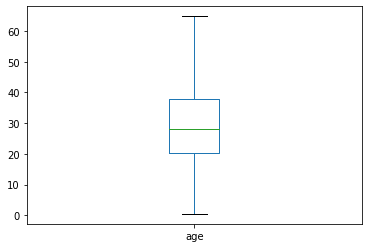

In [41]:
df['age'].plot(kind='box')   

## sum() - 합계

데이터의 **합계**입니다. 문자열 column은 모든 데이터가 붙어서 출력될 수 있습니다.

In [42]:
df.sum(axis=0)

survived                                                    342
pclass                                                     2057
sex           malefemalefemalefemalemalemalemalemalefemalefe...
age                                                     21150.6
sibsp                                                       466
parch                                                       340
fare                                                    28693.9
who           manwomanwomanwomanmanmanmanchildwomanchildchil...
adult_male                                                  537
alive         noyesyesyesnonononoyesyesyesyesnononoyesnoyesn...
alone                                                       537
dtype: object

단일 column에 대한 **합계 출력**

In [43]:
# 'fare' column에 대한 합계 출력
df['fare'].sum()

28693.9493

## cumsum() - 누적합, cumprod() - 누적곱

누적되는 합계를 구할 수 있습니다.

In [44]:
# 'age' column에 대한 누적 합 구하기
df['age'].cumsum()

0         22.0000
1         60.0000
2         86.0000
3        121.0000
4        156.0000
          ...    
886    21073.6075
887    21092.6075
888           NaN
889    21118.6075
890    21150.6075
Name: age, Length: 891, dtype: float64

누적되는 곱도 구할 수 있으나, 일반적으로 **값이 너무 커지므로 잘 활용하지는 않습니다.**

In [45]:
# 'age' column에 대한 누적 곱 구하기
df['age'].cumprod()

0            22.0
1           836.0
2         21736.0
3        760760.0
4      26626600.0
          ...    
886           inf
887           inf
888           NaN
889           inf
890           inf
Name: age, Length: 891, dtype: float64

## var() - 분산

$\large 분산 = \Huge\frac{{}\sum_{i=1}^{n}(X_{i} - \bar{X})^{2}}{n}$

$\large 평균 = \huge \bar{x}$

In [46]:
# 의미 없는 데이터 = 분산이 0인 경우 모든 데이터가 같음
s = pd.Series([1,1,1,1,1])
s.var()

0.0

**Delta Degrees of Freedom**
- s는 Series (default는 1)
- s.var(ddof=1) : 표본(sample)에 대한 분산을 구할 때 사용하는 함수 (편차의 제곱의 합을 n-1로 나눔)
- s.var(ddof=0) : 모집단(population)에 대한 분산을 구할 때 사용하는 함수 (편차의 제곱의 합을 n로 나눔)
- a는 ndarray (default는 0)
- a.var(ddof=1), a.var(ddof=0)

In [51]:
# 표본평균
fare_mean = df['fare'].values.mean()

# 표본분산 
ddof = 1
my_var = ((df['fare'].values - fare_mean) ** 2).sum() / (df['fare'].count() - ddof)
my_var

2469.436845743116

In [54]:
# df의 'fare' column에 대한 분산을 함수를 사용해 구해봅니다.
df.fare.var(ddof=1)

2469.436845743116

## std() - 표준편차

$\large 표준편차 =\huge \sqrt{분산} = \sqrt{\frac{{}\sum_{i=1}^{n}(X_{i} - \bar{X})^{2}}{n}}$

분산(var)의 제곱근

In [58]:
np.sqrt(df['fare'].var(ddof=1))

49.6934285971809

In [59]:
# std 함수 사용
df['fare'].std(ddof=1)

49.6934285971809

In [60]:
np.sqrt(my_var)

49.6934285971809

## min() - 최소값, max() - 최대값

In [61]:
# 최소값
df['age'].min()

0.42

In [62]:
# 최대값
df['age'].max()  # 이상치에서 upper로 수정해 놓았음

64.8125

## quantile() - 분위

**Quantile이란 주어진 데이터를 동등한 크기로 분할하는 지점**을 말합니다

10%의 경우 0.1을, 80%의 경우 0.8을 대입하여 값을 구합니다.

In [65]:
# df의 'age' column에 대해 10% quantile을 구해 봅니다.
df.age.quantile(0.1)

14.0

In [67]:
# df의 'age' column에 대해 80% quantile을 구해 봅니다.
df.age.quantile([0.1, 0.8])

0.1    14.0
0.8    41.0
Name: age, dtype: float64

## unique() - 고유값, nunique() - 고유값 개수

고유값과 고유값의 개수를 구하고자 할 때 사용합니다.

**unique()**

In [68]:
#  df의 'who' 컬럼에 대해 고유값을 구해봅니다.
df['who'].unique()

array(['man', 'woman', 'child'], dtype=object)

**nunique()**: 고유값의 개수를 출력합니다.

In [69]:
# df의 'who' column 에 대한 고유값의 개수를 구해봅니다.
df['who'].nunique()

3

In [70]:
# s.unique()는 np.nan을 포함한다
s = pd.Series([1, 2, np.nan, 1, 2, np.nan])
s.unique()

array([ 1.,  2., nan])

In [73]:
# s.value_counts()는 np.nan을 포함하기 위해서 dropna=False를 사용해야 한다
s = pd.Series([1, 2, np.nan, 1, 2, np.nan])
s.value_counts(dropna=False)

NaN    2
2.0    2
1.0    2
dtype: int64

## mode() - 최빈값

최빈값은 **가장 많이 출현한 데이터**를 의미합니다.

In [77]:
s = pd.Series([2, 2, np.nan, 1, 1, np.nan])
s.mode()

0    1.0
1    2.0
dtype: float64

In [74]:
# df의 'who' column에 대한 최빈값을 구해봅니다.
df['who'].mode()

0    man
dtype: object

카테고리형 데이터에도 적용 가능합니다.

In [78]:
# df의 'deck' column에 대한 최빈값을 구해봅니다.
df['deck'].mode()[0]

'C'

## corr() - 상관관계 

`corr()`로 컬럼(column)별 **상관관계**를 확인할 수 있습니다.

- **-1~1 사이의 범위**를 가집니다.
- **-1에 가까울 수록 반비례** 관계, **1에 가까울수록 정비례** 관계를 의미합니다.

In [79]:
# df의 각 column 사이의 상관계수를 구합니다.
df.corr()

,survived,pclass,age,sibsp,parch,fare,adult_male,alone
survived,1.000000,-0.338481,-0.076963,-0.035322,0.081629,0.257307,-0.557080,-0.203367
pclass,-0.338481,1.000000,-0.371017,0.083081,0.018443,-0.549500,0.094035,0.135207
age,-0.076963,-0.371017,1.000000,-0.310364,-0.189806,0.098119,0.279876,0.197559
sibsp,-0.035322,0.083081,-0.310364,1.000000,0.414838,0.159651,-0.253586,-0.584471
parch,0.081629,0.018443,-0.189806,0.414838,1.000000,0.216225,-0.349943,-0.583398
fare,0.257307,-0.549500,0.098119,0.159651,0.216225,1.000000,-0.182024,-0.271832
adult_male,-0.557080,0.094035,0.279876,-0.253586,-0.349943,-0.182024,1.000000,0.404744
alone,-0.203367,0.135207,0.197559,-0.584471,-0.583398,-0.271832,0.404744,1.000000


In [81]:
df.groupby(by=['survived', 'adult_male'])['survived'].count()

survived  adult_male
0         False         100
          True          449
1         False         254
          True           88
Name: survived, dtype: int64

**특정 컬럼에 대한 상관관계**를 확인할 수 있습니다.

In [82]:
df.corr()['survived']

survived      1.000000
pclass       -0.338481
age          -0.076963
sibsp        -0.035322
parch         0.081629
fare          0.257307
adult_male   -0.557080
alone        -0.203367
Name: survived, dtype: float64